<a href="https://colab.research.google.com/github/gjrkdgh0772/Python-Review/blob/master/lec17_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lec17. ARIMA - Time Seris Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [ ]:
df = pd.read_csv("./lec17_bitcoin.txt", sep="\t",
                # dtype={
                #        'Price':'float64', 
                #        'Open':'float64', 
                #        'High':'float64', 
                #        'Low':'float64', 
                #        'Vol.':'float64'}
                #, parse_dates="Date"  dtype
                ) 

In [ ]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change'], dtype='object')

In [ ]:
print(df.shape)
print(df.info())
df.head()


(59, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    59 non-null     object 
 1   Price   59 non-null     object 
 2   Open    59 non-null     object 
 3   High    59 non-null     object 
 4   Low     59 non-null     object 
 5   Vol.    59 non-null     object 
 6   Change  59 non-null     float64
dtypes: float64(1), object(6)
memory usage: 3.4+ KB
None


,Date,Price,Open,High,Low,Vol.,Change
0,31-Mar-19,"4,102.30","4,111.80","4,121.90","4,082.20",2.43M,-23.0
1,30-Mar-19,"4,111.80","4,103.70","4,138.10","4,057.10",2.55M,23.0
2,29-Mar-19,"4,102.20","4,025.70","4,123.10","4,022.60",3.30M,190.0
3,28-Mar-19,"4,025.60","4,041.70","4,041.70","4,008.40",2.11M,-40.0
4,27-Mar-19,"4,041.70","3,942.80","4,043.30","3,936.20",2.78M,251.0


# 콤마 없에기, 날짜 포맷변경

<table style="border-collapse: collapse; width: 100%; height: 452px;" border="1" data-ke-style="style15">
<tbody>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>포맷 코드</b></td>
<td style="width: 47.7616%; height: 18px;">설명</td>
<td style="width: 24.9419%; height: 18px;">예</td>
</tr>
<tr style="height: 38px;">
<td style="width: 8.83722%; height: 38px;"><b>%a</b></td>
<td style="width: 47.7616%; height: 38px;">요일을 짧게 표시합니다.</td>
<td style="width: 24.9419%; height: 38px;">Sun</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%A</b></td>
<td style="width: 47.7616%; height: 18px;">요일을 길게 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">Sunday</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%w</b></td>
<td style="width: 47.7616%; height: 18px;">요일을 숫자로 표시합니다. 일요일을 0부터 시작하여 토요일은 6입니다.</td>
<td style="width: 24.9419%; height: 18px;">0</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%d</b></td>
<td style="width: 47.7616%; height: 18px;">날(day)을 출력합니다. 1부터 31까지가 있겠죠</td>
<td style="width: 24.9419%; height: 18px;">18</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%b</b></td>
<td style="width: 47.7616%; height: 18px;">월을 영어로 짧게 출력해줍니다.</td>
<td style="width: 24.9419%; height: 18px;">Apr</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%B</b></td>
<td style="width: 47.7616%; height: 18px;">월을 영어로 길게 출력해줍니다.</td>
<td style="width: 24.9419%; height: 18px;">April</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%m</b></td>
<td style="width: 47.7616%; height: 18px;">월을 숫자로 표현합니다.</td>
<td style="width: 24.9419%; height: 18px;">04</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%y</b></td>
<td style="width: 47.7616%; height: 18px;">년을 짧게 숫자로 표시합니다</td>
<td style="width: 24.9419%; height: 18px;">21</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%Y</b></td>
<td style="width: 47.7616%; height: 18px;">년을 길게 숫자로 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">2021</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%H</b></td>
<td style="width: 47.7616%; height: 18px;">시간을 24시간의 표현 방식(00-23)으로 숫자로 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">18</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%I</b></td>
<td style="width: 47.7616%; height: 18px;">시간을 0-12시 표시 방법으로 표시합니다</td>
<td style="width: 24.9419%; height: 18px;">6</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%p</b></td>
<td style="width: 47.7616%; height: 18px;">오전(AM), 오후(PM)을 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">PM</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%M</b></td>
<td style="width: 47.7616%; height: 18px;">분(0 - 59)을 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">38</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%S</b></td>
<td style="width: 47.7616%; height: 18px;">초(0 - 59)를 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">55</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%f</b></td>
<td style="width: 47.7616%; height: 18px;">microsecond단위를 표시합니다.</td>
<td style="width: 24.9419%; height: 18px;">545433</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%j</b></td>
<td style="width: 47.7616%; height: 18px;">일년중 몇번째일인지 나타냅니다.</td>
<td style="width: 24.9419%; height: 18px;">108</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%U</b></td>
<td style="width: 47.7616%; height: 18px;">일년 중 몇번째 주 인지 나타내니다. 이 포맷에서 일요일은 일주일의 시작입니다. 일년은 52주, 53주입니다.</td>
<td style="width: 24.9419%; height: 18px;">108</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%W</b></td>
<td style="width: 47.7616%; height: 18px;">일년 중 몇번째 주 인지 나타내는 것은 %U와 같지만 일주일의 시작을 월요일로 정합니다.</td>
<td style="width: 24.9419%; height: 18px;">108</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%c</b></td>
<td style="width: 47.7616%; height: 18px;">Local version의 날짜와 시간을 나타냅니다.</td>
<td style="width: 24.9419%; height: 18px;">Sun&nbsp;Apr&nbsp;18&nbsp;17:26:26&nbsp;2021</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%x</b></td>
<td style="width: 47.7616%; height: 18px;">Local version의 날짜만 나타냅니다.</td>
<td style="width: 24.9419%; height: 18px;">04/18/21</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.83722%; height: 18px;"><b>%X</b></td>
<td style="width: 47.7616%; height: 18px;">Local version의 시간만 나타냅니다.</td>
<td style="width: 24.9419%; height: 18px;">17:26:26</td>
</tr>
</tbody>
</table>

### (방법1) read_csv에서 직접 

In [ ]:
from datetime import datetime as dt
df = pd.read_csv("./lec17_bitcoin.txt", sep="\t")
df['Date'] = df['Date'].apply(lambda x: dt.strptime(x, "%d-%b-%y"))
df.head()

,Date,Price,Open,High,Low,Vol.,Change
0,2019-03-31,"4,102.30","4,111.80","4,121.90","4,082.20",2.43M,-23.0
1,2019-03-30,"4,111.80","4,103.70","4,138.10","4,057.10",2.55M,23.0
2,2019-03-29,"4,102.20","4,025.70","4,123.10","4,022.60",3.30M,190.0
3,2019-03-28,"4,025.60","4,041.70","4,041.70","4,008.40",2.11M,-40.0
4,2019-03-27,"4,041.70","3,942.80","4,043.30","3,936.20",2.78M,251.0


In [ ]:
my_parser = lambda x: dt.strptime(x, "%d-%b-%y")
df = pd.read_csv("./lec17_bitcoin.txt", sep="\t",
                  thousands=",",
                  parse_dates = ['Date'],  # data처리할 컬럼명 2019-03-01
                  date_parser = my_parser
                 #???
                ) 
df.head()

,Date,Price,Open,High,Low,Vol.,Change
0,2019-03-31,4102.3,4111.8,4121.9,4082.2,2.43M,-23.0
1,2019-03-30,4111.8,4103.7,4138.1,4057.1,2.55M,23.0
2,2019-03-29,4102.2,4025.7,4123.1,4022.6,3.30M,190.0
3,2019-03-28,4025.6,4041.7,4041.7,4008.4,2.11M,-40.0
4,2019-03-27,4041.7,3942.8,4043.3,3936.2,2.78M,251.0


### (방법2) replace() 이용

In [ ]:
df = pd.read_csv("./lec17_bitcoin.txt", sep="\t", thousands=",",) 
# df = df[''].str.replace(',', '').astype('float64')  #비효율적
df['Vol.'] = df['Vol.'].str.replace('M', '')
df['Vol.'] = df['Vol.'].str.replace('K', '').astype('float64')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head()

,Date,Price,Open,High,Low,Vol.,Change
0,2019-03-31,4102.3,4111.8,4121.9,4082.2,2.43,-23.0
1,2019-03-30,4111.8,4103.7,4138.1,4057.1,2.55,23.0
2,2019-03-29,4102.2,4025.7,4123.1,4022.6,3.30,190.0
3,2019-03-28,4025.6,4041.7,4041.7,4008.4,2.11,-40.0
4,2019-03-27,4041.7,3942.8,4043.3,3936.2,2.78,251.0


### (방법3) 정규표현식 사용

In [ ]:
import re
df = pd.read_csv("./lec17_bitcoin.txt", sep="\t") 
for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']:
    #df[col].str.replace(pat=r'[^0-9.-]', repl=r'', regex=True) -- error 
    df[col] = df[col].apply(lambda x : re.sub('[^0-9.-]', '', '{}'.format(x))).astype('float64')
    #df[col] = [re.sub('[^0-9.-]', '', '{}'.format(x)) for x in df[col]]
df['Date'] = df['Date'].astype('datetime64[ns]')    
df.head()    

,Date,Price,Open,High,Low,Vol.,Change
0,2019-03-31,4102.3,4111.8,4121.9,4082.2,2.43,-23.0
1,2019-03-30,4111.8,4103.7,4138.1,4057.1,2.55,23.0
2,2019-03-29,4102.2,4025.7,4123.1,4022.6,3.30,190.0
3,2019-03-28,4025.6,4041.7,4041.7,4008.4,2.11,-40.0
4,2019-03-27,4041.7,3942.8,4043.3,3936.2,2.78,251.0


In [ ]:
df = df.sort_values(by="Date", ascending=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 58 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    59 non-null     datetime64[ns]
 1   Price   59 non-null     float64       
 2   Open    59 non-null     float64       
 3   High    59 non-null     float64       
 4   Low     59 non-null     float64       
 5   Vol.    59 non-null     float64       
 6   Change  59 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.7 KB


# EDA

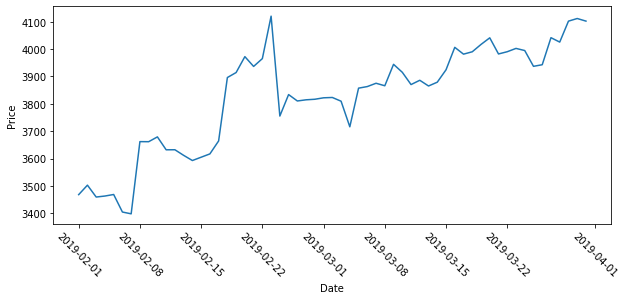

In [ ]:
plt.figure(figsize = (10,4))
ax = sns.lineplot(x='Date',y='Price',data=df)
plt.xticks(rotation = - 45 )
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

* 비정상 데이터  : 시간이 지난엠따라 평균, 분산이 일정하지 않은 데이터

# statsmodels
* ver 1.10.2 이하에서 테스트  : 버전업에 따른 패키지 변화 심하다...........................****
* ref :https://pypi.org/project/statsmodels/
* ARIMA : https://otexts.com/fppkr/non-seasonal-arima.html

* AR : PACF : p=1
* MA : ACF  : q=0
* ARIMA(p, d ,q)

In [ ]:
# ! pip install statsmodel==1.10.2

## ARIMA


<font color=red><b>ARIMA(Autoregressive Integrated Moving Average) 
  <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min.png" width=600>
---
<pre>    
<font color=red><b>AR(Autoregression:자기회귀)</b></font> - 이전 관측값의 오차항이 이후 관측값에 영향을 주는 모형
  <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>
<font color=red><b>Intgrated</b></font>
  누적을 의미
<font color=red><b>MA(Moving Average:이동평균)</b></font> - 관측값이 이전의 연속적인 오차항의 영향을 받는다는 모형
  <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" width=400>


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA  #statsmodel version 1.12  over
from statsmodels.tsa.arima_model import ARIMA  #statsmodel version 1.10.2  under

c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ACF PACF plot

In [ ]:
pdf = df[['Date','Price']].copy()
pdf.sort_values(by='Date', ascending=True)
pdf = pdf.set_index('Date')
pdf.head()

,Price
Date,
2019-02-01,3467.9
2019-02-02,3502.5
2019-02-03,3459.1
2019-02-04,3462.8
2019-02-05,3468.4


### 데이터 1차분

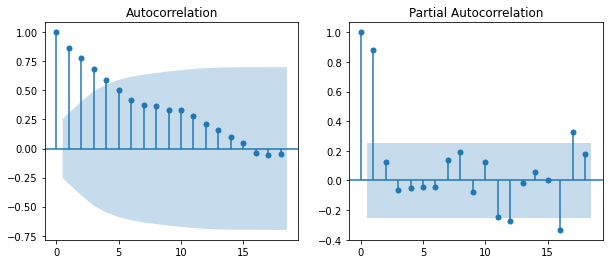

In [ ]:
p, axes = plt.subplots(1,2,figsize=(10,4))
plot_acf(pdf, ax=axes[0])
plot_pacf(pdf, ax=axes[1])
plt.show()

<pre>
<font color=red><b>
* ARIMA(p,d,q) = ARIMA(1,1,0)
* PACF 차트를 통해 1차분 한 결과 정상성의 데이터를 보였다. == p=1
* I : 데이터를 정상성의 데이터를 보였다. == d=1
* ACF : 완만한 경사도를 보인다  == MA성향의 데이터가 아니다  = q=0

### 모델 학습 & 예측

In [ ]:
model = ARIMA(pdf, order=(1,0,0))
fit_res = model.fit()  #
print(fit_res.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   59
Model:                     ARMA(1, 0)   Log Likelihood                -343.216
Method:                       css-mle   S.D. of innovations             79.915
Date:                Tue, 08 Feb 2022   AIC                            692.432
Time:                        10:18:04   BIC                            698.665
Sample:                    02-01-2019   HQIC                           694.865
                         - 03-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3810.6436    128.081     29.752      0.000    3559.610    4061.677
ar.L1.Price     0.9330      0.049     19.184      0.000       0.838       1.028
                                    Roots       

c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<pre>
<font color=red><b>
P>|z| : t-test 
t-test < 0.05   : 유의미하다 
</b></font>

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# print(result)
# print('constance p-value: %f' % result[0])  #-----------무의미하다. 사용안함
# print('AR 모형    p-value: %f' % result[1])
# print('MA 모형    p-value: %f' % result[2])

In [ ]:
# # Plot residual errors
# residuals = pd.DataFrame(fit_res.resid)
# fig, ax = plt.subplots(1,2, figsize=(10,3))
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

###  plot_predict()

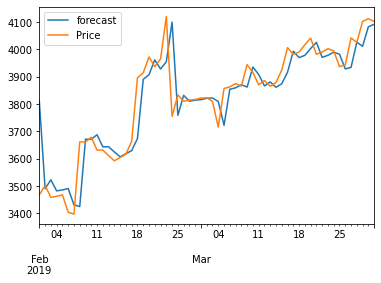

In [ ]:
fit_res.plot_predict(dynamic=False)  # in-sample lagged values are used for prediction
plt.show()

In [ ]:
df.iloc[-3:]

,Date,Price,Open,High,Low,Vol.,Change
2,2019-03-29,4102.2,4025.7,4123.1,4022.6,3.30,190.0
1,2019-03-30,4111.8,4103.7,4138.1,4057.1,2.55,23.0
0,2019-03-31,4102.3,4111.8,4121.9,4082.2,2.43,-23.0


In [ ]:
pdf.head()

,Price
Date,
2019-02-01,3467.9
2019-02-02,3502.5
2019-02-03,3459.1
2019-02-04,3462.8
2019-02-05,3468.4


In [ ]:
# Apr 01, 2019	4,145.1	4,102.3	4,159.1	4,076.8	3.22M	1.04%
# Apr 02, 2019	4,859.3	4,145.1	4,899.6	4,143.5	14.77M	17.23%
# Apr 03, 2019	4,968.7	4,859.3	5,278.4	4,814.0	13.83M	2.25%

In [ ]:

model = ARIMA(pdf, order=(1,0,0))
fit_res = model.fit()
# pred = fit_res.forecast(steps=3)  # 4,145.1
pred = fit_res.predict(start=1, end=5,  dynamic=False)

print(pred)
print("--"*30)
print(pdf['2019-02-02':'2019-02-06'])

2019-02-02    3490.877932
2019-02-03    3523.158307
2019-02-04    3482.667894
2019-02-05    3486.119841
2019-02-06    3491.344411
Freq: D, dtype: float64
------------------------------------------------------------
             Price
Date              
2019-02-02  3502.5
2019-02-03  3459.1
2019-02-04  3462.8
2019-02-05  3468.4
2019-02-06  3404.3


c:\ai\pythonproject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


### 평가
* ref  : https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [ ]:
# Accuracy metrics
def my_score(forecast, actual):
    # mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    # me = np.mean(forecast - actual)                          # ME
    # mpe = np.mean((forecast - actual)/actual)                # MPE
    # acf1 = acf(pred-test)[1]                                 # ACF1
    # corr = np.corrcoef(forecast, actual)[0,1]                # corr
    
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    rmse = np.mean((forecast - actual)**2)**.5                 # RMSE
    
    mins = np.amin(np.hstack([forecast[:,None],  actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],  actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)                            # minmax
    
    # return({'mape':mape, 'me':me, 'mae': mae,  'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})
    return({'MAE': mae,  'RMSE':rmse, 'minmax':minmax})

# Apr 01, 2019	4,145.1
# Apr 02, 2019	4,859.3
# Apr 03, 2019	4,968.7

print(pred.values)
print(pdf['2019-02-02':'2019-02-06'].values.reshape(-1))
pred = pred.values
y_true = pdf['2019-02-02':'2019-02-06'].values.reshape(-1)
my_score(pred, y_true)

[3490.87793154 3523.15830726 3482.66789378 3486.11984148 3491.34441096]
[3502.5 3459.1 3462.8 3468.4 3404.3]


{'MAE': 40.06250438773841,
 'RMSE': 50.04796632939464,
 'minmax': 0.0114439077506292}